In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)

# A Little Statistics

## Question 1:

B: I made several variables that hold the cdf for sigmas between -2 and 2, and compared them to the z-table here: https://en.wikipedia.org/wiki/Standard_normal_table

In [12]:
cdf = stats.norm.cdf(-2)
cdf2 = stats.norm.cdf(-1)
cdf3 = stats.norm.cdf(0)
cdf4 = stats.norm.cdf(1)
cdf5 = stats.norm.cdf(2)
print([cdf, cdf2, cdf3, cdf4, cdf5])
print('These percentages match the z-table.')

[0.022750131948179195, 0.15865525393145707, 0.5, 0.8413447460685429, 0.9772498680518208]
These numbers match the z-table.


C: Using my variables from (B), I will now use <stats.norm.ppf> to find the sigma.

In [15]:
ppf = stats.norm.ppf(cdf)
ppf2 = stats.norm.ppf(cdf2)
ppf3 = stats.norm.ppf(cdf3)
ppf4 = stats.norm.ppf(cdf4)
ppf5 = stats.norm.ppf(cdf5)
print([ppf, ppf2, ppf3, ppf4, ppf5])
print('These sigma values match the z-table approximately.')

[-2.000000000000001, -1.0, 0.0, 1.0, 2.0000000000000004]
These sigma values match the z-table approximately.


D: Negative values appear in my ppf results because the ppf returns the location of the probability that that sigma appears in (i.e. .02275 returns sigma -2, .1586 returns sigma -1, so on and so forth.) Outside of this, negative numbers could also appear because the same probability can lay on two different points in a distribution such as a gaussian.

## Question 2

A: The distribution I chose is the Rayleigh distribution. The Rayleigh distribution is a continuous distribution that can be found in finding Gaussian amplitudes. It can also be observed as the magnitude of a vector is related to the directional components of that vector.

B: Below is a graph of the Rayleigh distribution.

Text(0, 0.5, 'probability')

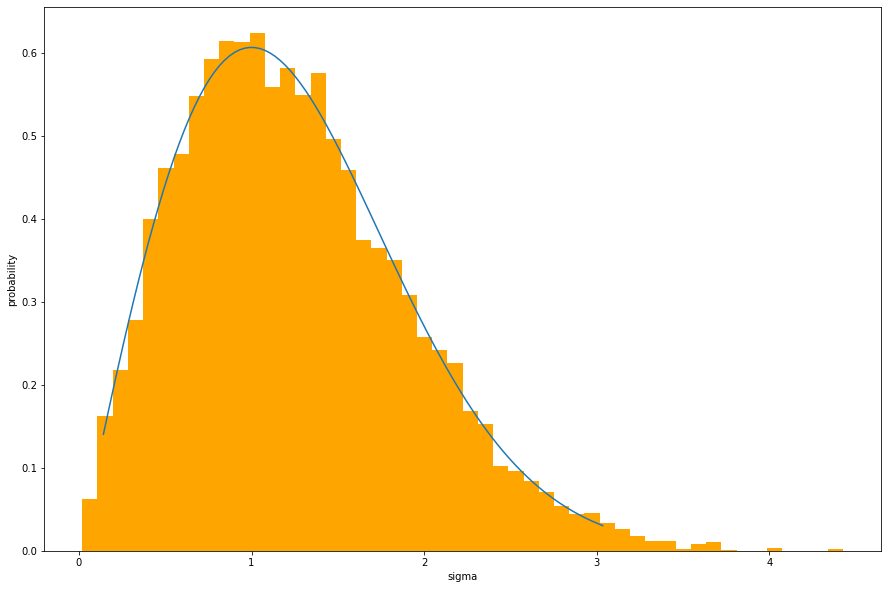

In [31]:
x = np.linspace(stats.rayleigh.ppf(0.01),
                stats.rayleigh.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.rayleigh.pdf(x))
rv_ray = stats.rayleigh.rvs(size=10000)
ax.hist(rv_ray, density=True, color = 'orange', bins = 50)

ax.set_xlabel('sigma')
ax.set_ylabel('probability')

## Question 3

A: A hypothetical measurement from my distribution could be the value 2.

B: The statistical question I would want to ask in words would be "Is this measurement meaningful and probable?"

C: $f(x) = x*exp(-x^2/2)$

D: Using .cdf and .ppf, I can find how probable it is to for the noise to produce a value of 2.

In [53]:
cdf_ray = stats.rayleigh.cdf(2)
noise_probability = 1 - cdf_ray
noise_probability

0.1353352832366127

E: The equivalent sigma is calculated below:

In [54]:
ppf_ray = stats.rayleigh.ppf(noise_probability)
ppf_ray

0.5392837061674663

The equivalent sigma for the probability that the noise generated a sigma value of 2 is around 54 percent.

## Question 4

In [56]:
rcdf1 = stats.rayleigh.cdf(0)
rcdf2 = stats.rayleigh.cdf(1)
rcdf3 = stats.rayleigh.cdf(3)
rcdf1, rcdf2, rcdf3

(0.0, 0.3934693402873666, 0.9888910034617577)

In [57]:
rppf1 = stats.rayleigh.ppf(1 - rcdf1)
rppf2 = stats.rayleigh.ppf(1 - rcdf2)
rppf3 = stats.rayleigh.ppf(1 - rcdf3)
rppf1, rppf2, rppf3

(inf, 1.365834638283265, 0.149473491083181)

These values also relate to the probability that noise generated these values.

# Non-continuous distributions

## Question 1: Poisson

A: The Poisson distribution expresses the probability of an event happening if the event happening does not affect the probability of future events happening. 

B: Here are a few graphs of the Poisson distribution.

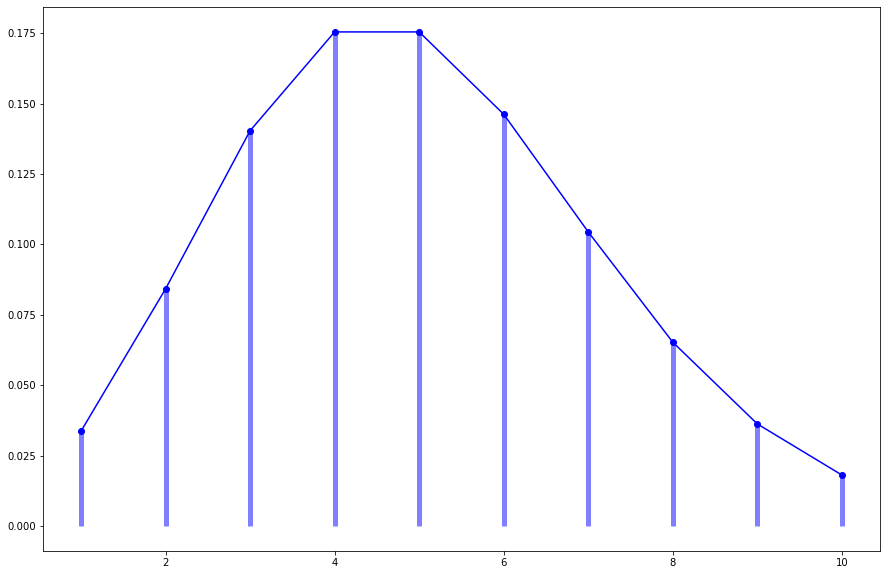

In [24]:
mu = 5
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo-')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

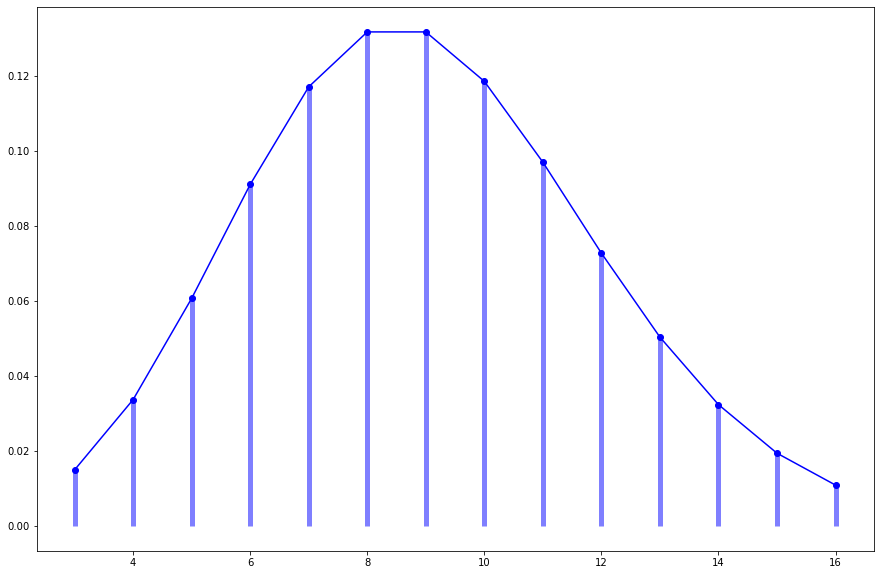

In [28]:
mu = 9
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo-')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

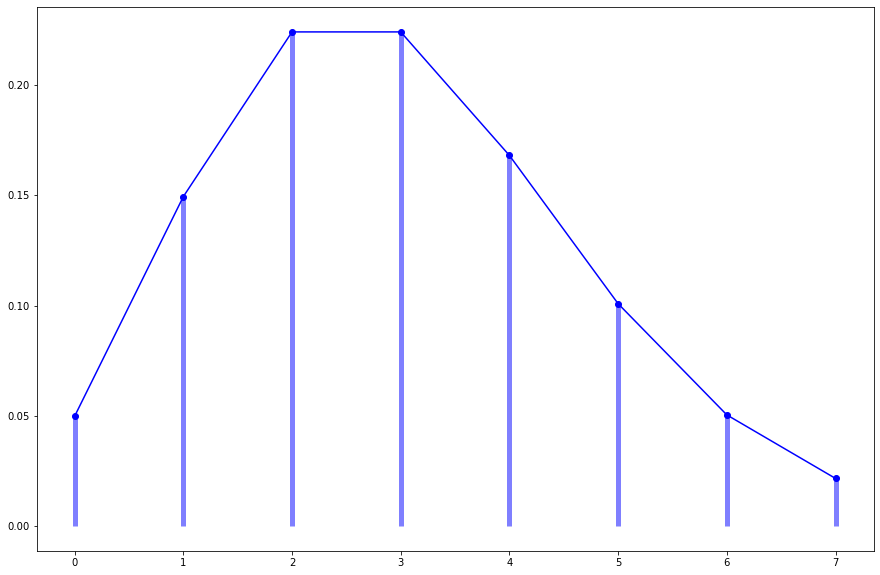

In [29]:
mu = 3
x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo-')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

The mu value (mean between event occurances) determines the spacing between points that have meaningful probability, and the less points there are the higher the probability is at the peak.

C: A hypothetical question that can apply to this is "What would be the chance that a certain event does not happen 7 times in one session if the mean number of events per session is 5? What is its sigma?"

In [31]:
po_cdf = stats.poisson.cdf(7, 5)
po_cdf

0.8666283259299925

In [33]:
non = 1 - po_cdf
non

0.1333716740700075

In [34]:
po_ppf = stats.poisson.ppf(non, 5)
po_ppf

3.0

D: Because the distribution is discrete, and by extension their probability and sigmas, the implications for experiments would be that results with this distribution/pattern would also be discrete, and thus only have a certain number of non-negative values.

E: The fact that the parameters don't have to be discrete makes sense because the mean can be non-discrete, and can change fluidly throughout the input of more data into a Poisson distribution.